In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [25]:
performance = pd.read_csv('/content/drive/MyDrive/mydataset/sp.csv')

In [36]:
performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [37]:
performance.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95
9999,7,74,0,8,1,64


In [27]:
performance.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [28]:
performance['Extracurricular Activities'] = performance['Extracurricular Activities'].map({'No': 0, "Yes": 1})

In [62]:
x = performance.drop('Performance Index', axis=1)
y = performance['Performance Index']

In [63]:
column = performance.columns
column

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

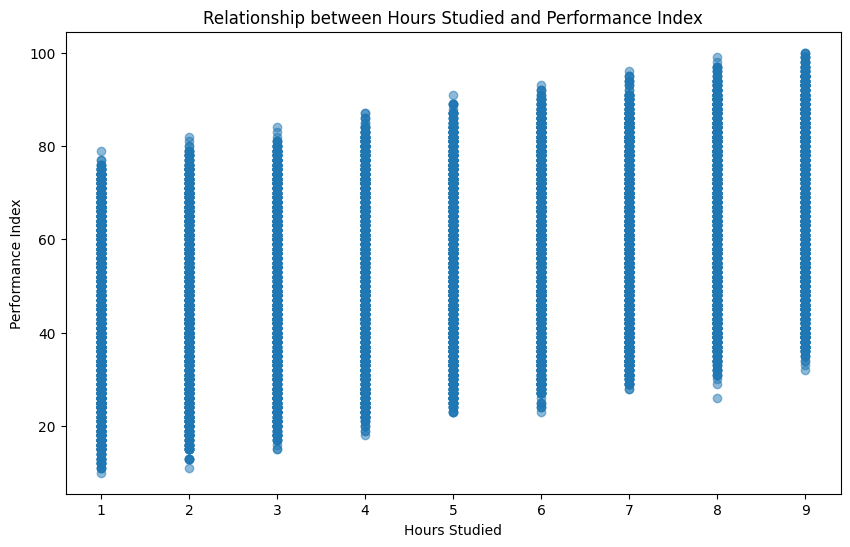

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(performance['Hours Studied'], y, alpha=0.5)
plt.title("Relationship between Hours Studied and Performance Index")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

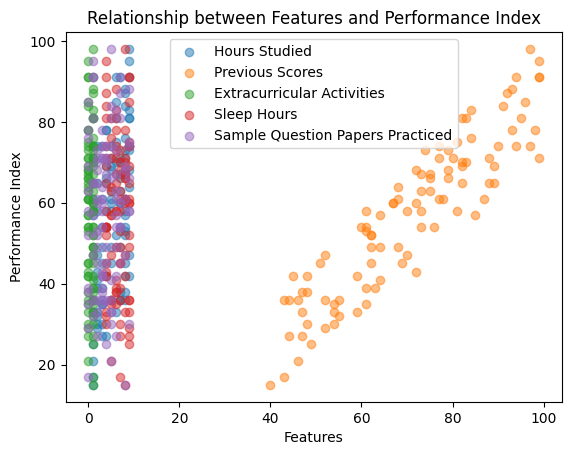

In [67]:
for col in x.columns:
    plt.scatter(x[col][:100], y[:100], alpha=0.5, label=col)
plt.title("Relationship between Features and Performance Index")
plt.xlabel("Features")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 41)

In [69]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [70]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [72]:
print(f"mean squared error:{mse}")
print(f"mean absolute error:{mae}")

mean squared error:4.208146545336665
mean absolute error:1.6294534711412807


In [73]:
r2 = r2_score(y_test, y_pred)
print(f"R*2 score:{r2}")

R*2 score:0.9885682859618207


In [76]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 55.261
Coefficients: [ 7.40508226 17.63275076  0.30378996  0.82359109  0.5556057 ]


In [78]:
print(performance.corr())

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

Training MSE: 4.137557313479912  | Test MSE: 4.208146545336665
Training R²: 0.9887968952093209  | Test R²: 0.9885682859618207


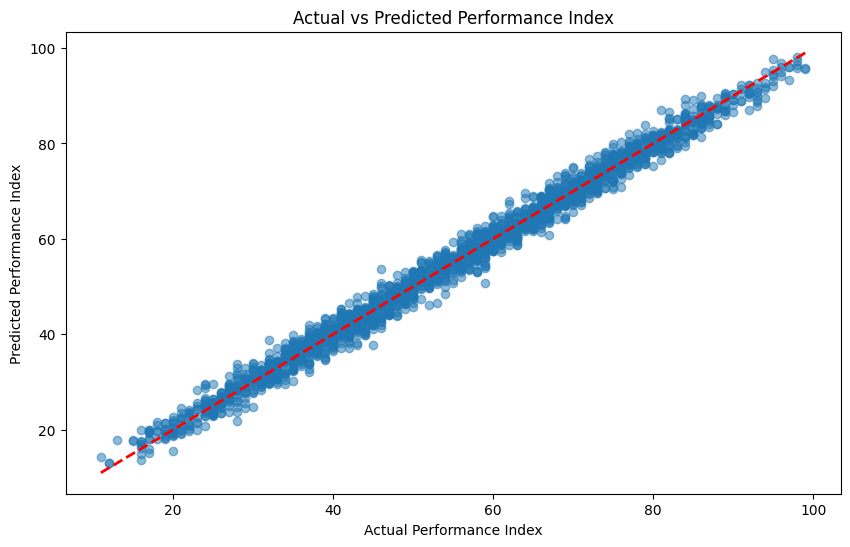

In [79]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse, " | Test MSE:", test_mse)
print("Training R²:", train_r2, " | Test R²:", test_r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Performance Index")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.show()